# Example of MCMC run

In [1]:
using JLD2
using FileIO
using PyPlot
using Statistics
using StatsBase 
using Distributions
using LinearAlgebra
import HDF5
using BenchmarkTools

In [2]:
using IntervalSets
using Random, ArraysOfArrays
using ValueShapes
using Measurements
using BenchmarkTools
using DSP

In [3]:
# using Revise
using Random123
using BAT 

In [4]:
# ENV["JULIA_DEBUG"] = "BAT"

# Load Data

In [5]:
function trunc_norm(m, sgm; alpha=2)
    minval = m - alpha*sgm < 0.0 ? 0.0 : m - alpha*sgm
    return truncated(Normal(m, sgm), minval, m + alpha*sgm)
end

trunc_norm (generic function with 1 method)

## 1.1 Low `p` Population: 

In [ ]:
# conv_mat = load("../data/experiment/dataset_2/m1/conv-matrix-upd-2.jld2")

# conv_matrices = (
#     cam_1 = conv_mat["cam_1"],
#     cam_2 = conv_mat["cam_2"],
#     cam_3 = conv_mat["cam_3"],
#     cam_4 = conv_mat["cam_4"], 
# )

# images = load("../data/experiment/dataset_2/m1/images-satur.jld2");
# event_number = 343

# # Small Charge: Ev_1_3 = 343, Ev_1_1 = 137, Ev_1_2 = 9

# event = (
#     cam_1 = images["cam_1"][event_number,:,:],
#     cam_2 = images["cam_2"][event_number,:,:],
#     cam_3 = images["cam_3"][event_number,:,:],
#     cam_4 = images["cam_4"][event_number,:,:],
#     population = images["charge"][event_number,:][1],
# );

## 1.2 High `p` Population: 

In [6]:
conv_mat = load("../data/experiment/dataset_2/m2/conv-matrix-upd-2.jld2") 

conv_matrices = (
    cam_1 = conv_mat["cam_1"],
    cam_2 = conv_mat["cam_2"],
    cam_3 = conv_mat["cam_3"],
    cam_4 = conv_mat["cam_4"], 
) 

images = load("../data/experiment/dataset_2/m2/images-satur.jld2"); # removed saturated pixels
# images = load("../data/experiment/dataset_2/m2/images.jld2"); # included saturated pixels
event_number = 2

# Large Charge: Ev_2_2 = 2, Ev_2_1 = 311, Ev_2_3 = 440

event = (
    cam_1 = images["cam_1"][event_number,:,:],
    cam_2 = images["cam_2"][event_number,:,:],
    cam_3 = images["cam_3"][event_number,:,:],
    cam_4 = images["cam_4"][event_number,:,:],
    population = images["charge"][event_number,:][1],
);


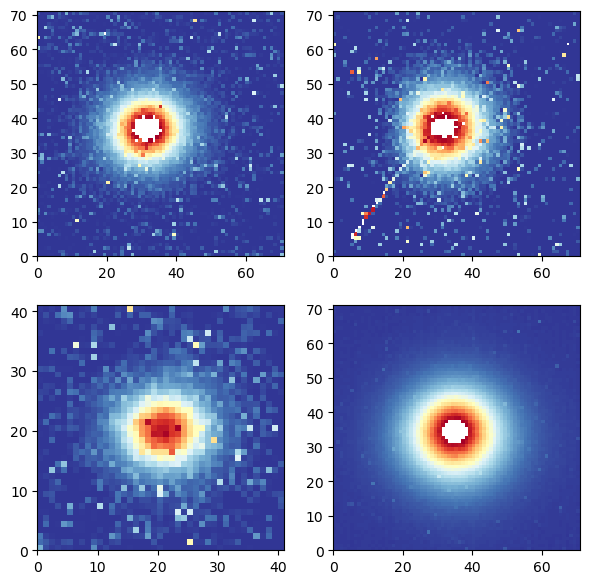

PyObject <matplotlib.collections.QuadMesh object at 0x7f4dd505dcd0>

In [7]:
fig, ax = plt.subplots(2,2, figsize=(7,7))
fig.subplots_adjust(hspace=0.2, wspace=0.2)

ax[1,1].pcolormesh(event.cam_1, cmap="RdYlBu_r")
ax[1,2].pcolormesh(event.cam_2, cmap="RdYlBu_r")
ax[2,1].pcolormesh(event.cam_3, cmap="RdYlBu_r")
ax[2,2].pcolormesh(event.cam_4, cmap="RdYlBu_r")

# Load Model

## Model 35: 

In [ ]:
# include("../src/model-35/likelihood.jl")
# include("../src/model-35/utill_model.jl")
# include("../src/utill.jl")

In [ ]:
β1= 0.015
β2 = 0.0077
β3 = 0.0058 

# prior = NamedTupleDist(
#     tr_size = [truncated(Normal(0.2, 0.04), 0.03, 0.19), truncated(Normal(0.2, 0.04), 0.03, 0.19)],
#     ang_spr = [truncated(Normal(4.0, 2.0), 1.0, 8.0), truncated(Normal(4.0, 2.0), 1.0, 8.0)],
#     waist = [truncated(Normal(2.9, 0.03), 2.6, 3.6),],
#     algmx = [23.0 .. 48, 23.0 .. 48.0, 10.0 .. 30.0, 23.0 .. 48.0],
#     algmy = [23.0 .. 48, 23.0 .. 48.0, 10.0 .. 30.0, 23.0 .. 48.0],
#     cam4_ped = 4.0 .. 40.0,
#     cam4_light_fluct = 1.0 .. 3.0,
#     cam4_light_amp = 1.6 .. 9.9, 
#     resx = [1.0, 1.0, 1.0], 
#     resy = [1.0, 1.0, 1.0], 
#     cam4_resx = truncated(Normal(3, 1.5), 0, Inf),
#     cam4_resy = truncated(Normal(3, 1.5), 0, Inf),
#     psx = [27.1, 21.6, 114.0], # 31, 32, 33
#     psy = [30.5, 23.4, 125.0], # 34, 35, 36
#     cam4_psx = 121.8, # 37
#     cam4_psy = 120.0, # 38
#     light_amp  = [1.0 .. 13.0 , 1.0 .. 17.0, 1.0 .. 5.0], # 1.0 .. 5.0
#     s_cam = [0.0, 1.478, 15.026, 23.1150],
# );  # works 

## Model 41: 

In [61]:
include("../src/model-41/likelihood.jl")
include("../src/model-41/utill_model.jl")
include("../src/utill.jl")

plot_projections (generic function with 1 method)

In [62]:
β1= 0.015
β2 = 0.0077
β3 = 0.0058 

prior = NamedTupleDist(
        tr_size = [truncated(Normal(0.2, 0.04), 0.03, 0.19), truncated(Normal(0.2, 0.04), 0.03, 0.19)],
        tr_size_2 = [truncated(Normal(0.2, 0.04), 0.03, 0.19), truncated(Normal(0.2, 0.04), 0.03, 0.19)],
        ang_spr = [truncated(Normal(4.0, 2.0), 1.0, 8.0), truncated(Normal(4.0, 2.0), 1.0, 8.0)],
        ang_spr_2 = [truncated(Normal(4.0, 2.0), 1.0, 4.0), truncated(Normal(4.0, 2.0), 1.0, 4.0)],
        mixt_pow =  0.35 .. 1.0, 
        waist = [truncated(Normal(2.9, 0.03), 2.6, 3.6)],
        waist_2 = [truncated(Normal(2.9, 0.03), 2.6, 3.6)],
        algmx = [23.0 .. 48, 23.0 .. 48.0, 10.0 .. 30.0, 23.0 .. 48.0],
        algmy = [23.0 .. 48, 23.0 .. 48.0, 10.0 .. 30.0, 23.0 .. 48.0],
        cam4_ped = 4.0 .. 40.0,
        cam4_light_fluct = 1.0 .. 3.0,
        cam4_light_amp = 1.6 .. 9.9, 
        resx = [1, 1, 1], # 23, 24, 25, 
        resy = [1, 1, 1], # 26,27, 28, 
        cam4_resx = truncated(Normal(3, 1.5), 0, Inf),
        cam4_resy = truncated(Normal(3, 1.5), 0, Inf), 
        psx = [27.1, 21.6, 114.0], # 31, 32, 33
        psy = [30.5, 23.4, 125.0], # 34, 35, 36
        cam4_psx = 121.8, # 37
        cam4_psy = 120.0, # 38
        light_amp  = [1.0 .. 13.0 , 1.0 .. 17.0, 1.0 .. 5.0], # 1.0 .. 5.0
        s_cam = [0.0, 1.478, 15.026, 23.1150],
);

# MCMC settings: 

In [65]:
"""
    Log-Likelihood of the beamline (4 cameras included)
"""
function log_lik_ndiff(;  
    e = event,
    cv_mat = conv_matrices,
    func = conv_tabl_discrete,
    cv_1 = cv_mat.cam_1,
    cv_2 = cv_mat.cam_2,
    cv_3 = cv_mat.cam_3,
    n_threads = Threads.nthreads(),
    )
    
    return params -> begin 
        ll = 0.0
        ll += likelihood_cam13(params, e.cam_1, e.population, cv_1, func, 1, n_threads=n_threads)
        ll += likelihood_cam13(params, e.cam_2, e.population, cv_2, func, 2, n_threads=n_threads)
        ll += likelihood_cam13(params, e.cam_3, e.population, cv_3, func, 3, n_threads=n_threads)
        ll += likelihood_cam4(params, e.cam_4, e.population, 4, n_threads=n_threads)
        return LogDVal(ll)
    end
        
end

function log_lik_diff(;  
    e = event,
    cv_mat = conv_matrices,
    func = conv_tabl_cont,
    cv_1 = exp.(cv_mat.cam_1),
    cv_2 = exp.(cv_mat.cam_2),
    cv_3 = exp.(cv_mat.cam_3),
    n_threads = Threads.nthreads(),
    )
    
    return params -> begin 
        ll = 0.0
        ll += likelihood_cam13(params, e.cam_1, e.population, cv_1, func, 1, n_threads=n_threads)
        ll += likelihood_cam13(params, e.cam_2, e.population, cv_2, func, 2, n_threads=n_threads)
        ll += likelihood_cam13(params, e.cam_3, e.population, cv_3, func, 3, n_threads=n_threads)
        ll += likelihood_cam4(params, e.cam_4, e.population, 4, n_threads=n_threads)
        return LogDVal(ll)
    end
    
end

# log_likelihood = log_lik_diff()

log_likelihood = log_lik_ndiff()

#127 (generic function with 1 method)

In [66]:
posterior = PosteriorDensity(log_likelihood, prior)

tuning = AdaptiveMHTuning(
    λ = 0.5,
    α = ClosedInterval(0.15,0.25),
    β = 1.5,
    c = ClosedInterval(1e-4,1e2),
    r = 0.5,
)

mcmcalgo = MetropolisHastings(
    weighting = RepetitionWeighting(),
    tuning = tuning
)

rng = Philox4x()

init = MCMCChainPoolInit(
    init_tries_per_chain = 50 .. 150,
    nsteps_init = 1500
)

burnin = MCMCMultiCycleBurnin(
    max_ncycles = 150,
    nsteps_per_cycle = 35000
)

nsamples = 5*10^5
nchains = 4

convergence = BrooksGelmanConvergence(threshold=1.2);

In [67]:
@time samples_tot = bat_sample(
    rng, posterior,
    MCMCSampling(
        mcalg = mcmcalgo,
        trafo = NoDensityTransform(),
        nchains = nchains,
        nsteps = nsamples,
        init = init,
        burnin = burnin,
        convergence = convergence,
        strict = false,
#         store_burnin = false,
#         nonzero_weights = true,
    )
);

┌ Info: Using tranform algorithm DensityIdentityTransform()
└ @ BAT /user/.julia/packages/BAT/KbWVg/src/algotypes/bat_default.jl:44
┌ Info: Trying to generate 4 viable MCMC chain(s).
└ @ BAT /user/.julia/packages/BAT/KbWVg/src/samplers/mcmc/chain_pool_init.jl:56
┌ Info: Selected 4 MCMC chain(s).
└ @ BAT /user/.julia/packages/BAT/KbWVg/src/samplers/mcmc/chain_pool_init.jl:173
┌ Info: Begin tuning of 4 MCMC chain(s).
└ @ BAT /user/.julia/packages/BAT/KbWVg/src/samplers/mcmc/multi_cycle_burnin.jl:35
┌ Info: MCMC Tuning cycle 1 finished, 4 chains, 0 tuned, 0 converged.
└ @ BAT /user/.julia/packages/BAT/KbWVg/src/samplers/mcmc/multi_cycle_burnin.jl:65
┌ Info: MCMC Tuning cycle 2 finished, 4 chains, 0 tuned, 0 converged.
└ @ BAT /user/.julia/packages/BAT/KbWVg/src/samplers/mcmc/multi_cycle_burnin.jl:65
┌ Info: MCMC Tuning cycle 3 finished, 4 chains, 0 tuned, 0 converged.
└ @ BAT /user/.julia/packages/BAT/KbWVg/src/samplers/mcmc/multi_cycle_burnin.jl:65
┌ Info: MCMC Tuning cycle 4 finished, 4

2778.591945 seconds (11.24 G allocations: 6.849 TiB, 17.07% gc time)


In [89]:
samples = samples_tot.result;

In [90]:
minimum(bat_eff_sample_size(unshaped.(samples)).result)

272.54994991905807

In [91]:
size(flatview(unshaped.(samples.v)))

(41, 406279)

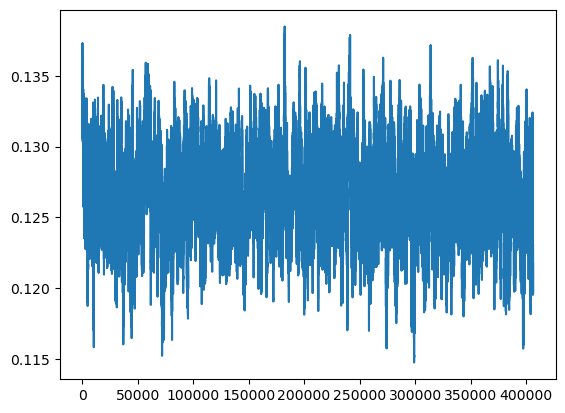

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f4dae96f8e0>

In [92]:
plot(flatview(unshaped.(samples.v))[3,:])

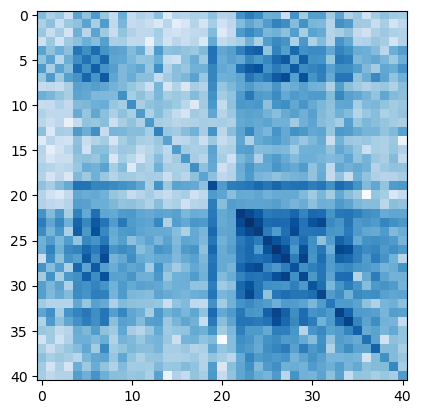

PyObject <matplotlib.image.AxesImage object at 0x7f4d15750a90>

In [93]:
plt.imshow(log.(abs.(cov(flatview(unshaped.(samples.v))'))), cmap="Blues")

In [94]:
# BAT.bat_write("../data/sampling_results/Tmp-Mixture-Model-38-2/mm-38-hc-2-fixed-lf.hdf5", unshaped.(samples))

# BAT.bat_write("../data/sampling_results/Benchmark-13/samples-23.hdf5", unshaped.(samples))

In [73]:
mode(samples)[1]

(tr_size = [0.07672839356274713, 0.11547253488951108], tr_size_2 = [0.12431856966168299, 0.14081040109344728], ang_spr = [6.230260340123984, 5.941538009510745], ang_spr_2 = [2.671809332415941, 2.795522142988761], mixt_pow = 0.669851306970097, waist = [3.1767687787620673], waist_2 = [2.847276967009639], algmx = [31.74418572058997, 32.23168349427095, 21.285693495621192, 35.23348225592279], algmy = [36.93398732069105, 37.406148556981556, 20.204231491435618, 33.92071312113327], cam4_ped = 27.33043502527625, cam4_light_fluct = 1.346281652367458, cam4_light_amp = 8.860003425032888, resx = [0.8107250974238147, 1.8408731909202636, 0.6215410570872915], resy = [0.3810706444433459, 2.4963834799164757, 0.4025532405062406], cam4_resx = 4.641959656276311, cam4_resy = 3.9279722323995276, psx = [26.28735628675285, 21.218229133708203, 115.69138076366421], psy = [30.025770474739677, 23.040770143748542, 126.89398450867503], cam4_psx = 120.42096103873841, cam4_psy = 118.6486080252989, light_amp = [8.54622

In [74]:
bat_marginalmode(samples).result

ShapedAsNT((tr_size = [0.08325, 0.1193], tr_size_2 = [0.1261, 0.1431], ang_spr = [6.2425, 5.922499999999999], ang_spr_2 = [2.715, 2.7350000000000003], mixt_pow = 0.66725, waist = [3.165], waist_2 = [2.847], algmx = [31.746499999999997, 32.210499999999996, 21.305, 35.2375], algmy = [36.9375, 37.430499999999995, 20.211, 33.909499999999994], cam4_ped = 27.244999999999997, cam4_light_fluct = 1.35375, cam4_light_amp = 8.8615, resx = [0.715, 1.81, 0.685], resy = [0.725, 2.71, 0.815], cam4_resx = 4.5649999999999995, cam4_resy = 4.085, psx = [26.325, 21.505000000000003, 115.7525], psy = [29.975, 23.235, 126.9225], cam4_psx = 120.3925, cam4_psy = 118.6125, light_amp = [8.553, 11.425, 2.6915], s_cam = [0.0, 1.478, 15.026, 23.115]))

In [75]:
mean(samples)[1]

(tr_size = [0.08219988553951756, 0.11846462205355893], tr_size_2 = [0.1264184647516305, 0.1441496411690962], ang_spr = [6.215514218700638, 5.891632382112754], ang_spr_2 = [2.6384428970174008, 2.628637857510482], mixt_pow = 0.6682868351833847, waist = [3.1628084998616997], waist_2 = [2.848063483007247], algmx = [31.746036542356766, 32.21345973296409, 21.30838292783494, 35.2386225517858], algmy = [36.93895364353416, 37.426608860274605, 20.210461325705403, 33.90836746045476], cam4_ped = 27.280342847328562, cam4_light_fluct = 1.3544165412646894, cam4_light_amp = 8.862351638671269, resx = [0.7512672642486271, 1.6096828277263067, 0.7231132849137457], resy = [0.6919509967076832, 2.3863530535992434, 0.7861455038735794], cam4_resx = 4.67638932066133, cam4_resy = 4.223774013674268, psx = [26.504988223586732, 21.52519459329999, 115.694199569731], psy = [30.101109896107562, 23.268198947296394, 126.80660513064632], cam4_psx = 120.4636191979343, cam4_psy = 118.72892602624673, light_amp = [8.55333541

In [76]:
std(samples)[1]

(tr_size = [0.006350922186674405, 0.005299675586288628], tr_size_2 = [0.003216640540056789, 0.0036619388357545936], ang_spr = [0.06382818780277716, 0.07305274427231523], ang_spr_2 = [0.12957364200742347, 0.1496690976185665], mixt_pow = 0.00836544446385119, waist = [0.02759166951647522], waist_2 = [0.030021053492452685], algmx = [0.020240305053522395, 0.02084920585772205, 0.04229333334577601, 0.015262554253646818], algmy = [0.01930125671245759, 0.021188598958109414, 0.02923104541515094, 0.014437766707571369], cam4_ped = 0.24449565305043328, cam4_light_fluct = 0.014025457769486195, cam4_light_amp = 0.017525478770843567, resx = [0.3790462602039281, 0.5554689835824482, 0.3701797706257653], resy = [0.33664051347288676, 0.4649246892980426, 0.38170837680733943], cam4_resx = 0.18664311473756579, cam4_resy = 0.2561114407217973, psx = [0.1743124189975452, 0.27986069230721167, 0.059854137157158836], psy = [0.29906096346203315, 0.29284089965625915, 0.11725106432371729], cam4_psx = 0.07233852615367

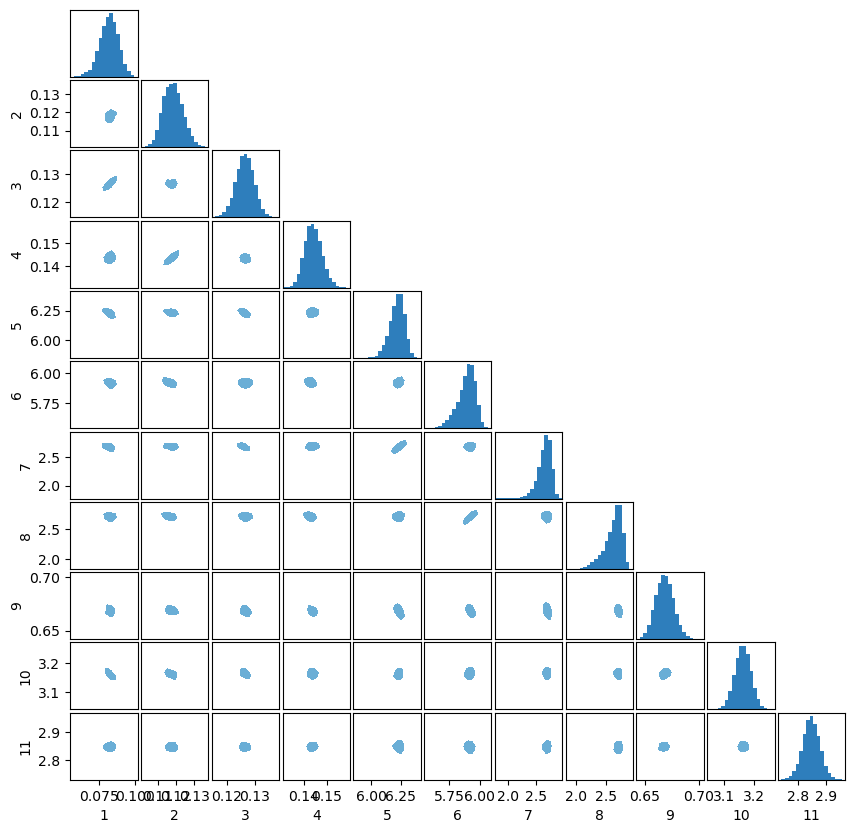

In [77]:
dims = [1,2,3,4,5,6,7,8,9,10,11]
# dims = [1,2,3,4,5,]
names = [1,2,3,4,5,6,7,8,9,10, 11]
levels = [0.01, 0.55, 0.9, 0.95,  1,]
levels = [0.001, 0.98, 1,]
figsize = (10,10)
n_bins = 20

corner_plots(samples, dims, names, levels_quantiles = levels, figsize=figsize, N_bins=n_bins)

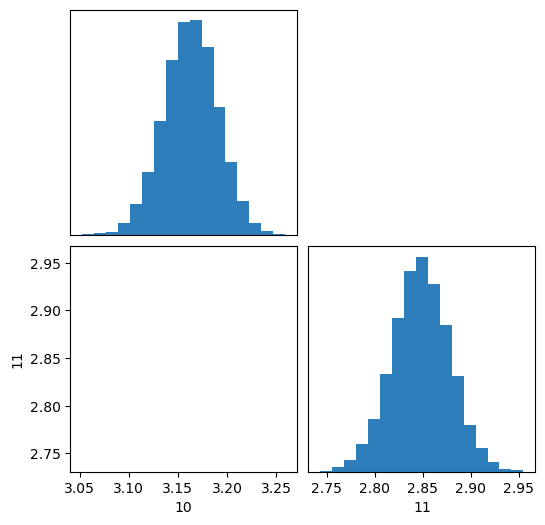

In [78]:
dims = [10,11,]
names = [10,11,]
levels = [0.1, 0.8, 0.9, 0.95,  1,]
levels = [0.1,  1,]
figsize = (6,6)
n_bins = 20

corner_plots(samples, dims, names, levels_quantiles = levels, figsize=figsize, N_bins=n_bins)

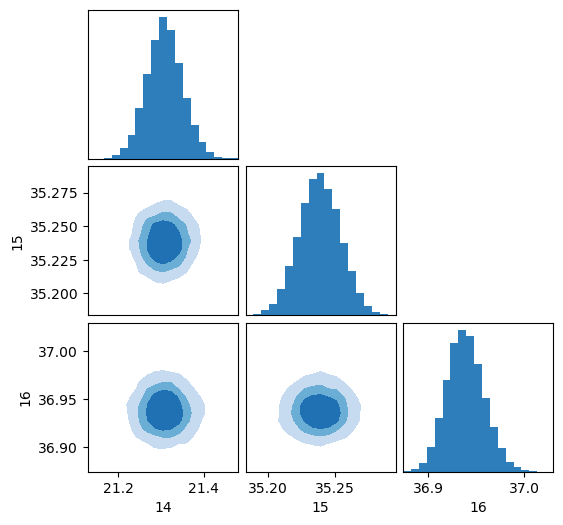

In [79]:
dims = [14,15,16,]
names = [14,15,16,]
levels = [0.1, 0.8, 0.9, 0.95,  1,]
# levels = [0.1, 0.5, 1,]
figsize = (6,6)
n_bins = 20

corner_plots(samples, dims, names, levels_quantiles = levels, figsize=figsize, N_bins=n_bins)

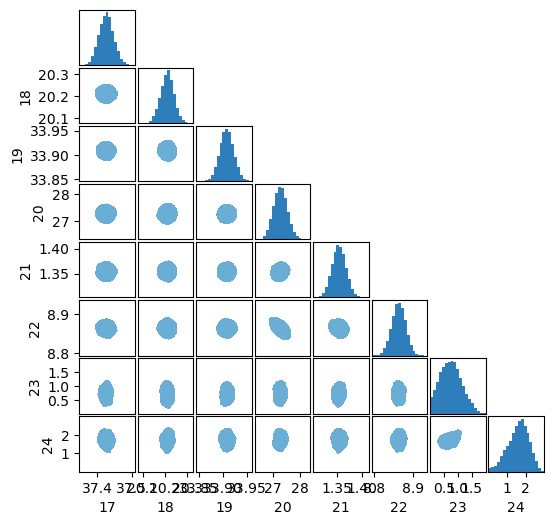

In [80]:
# res

dims = [17,18,19,20,21,22,23,24]
names = [17,18,19,20,21, 22, 23, 24]
levels = [0.1, 0.5, 0.9, 0.95,  1,]
levels = [0.1, 0.9, 1,]
figsize = (6,6)
n_bins = 20

corner_plots(samples, dims, names, levels_quantiles = levels, figsize=figsize, N_bins=n_bins)

In [81]:
#pix

dims = [25,26,27,28,29, 30, 31, 32]
names = [25,26,27,28,29, 30, 31, 32]
levels = [0.1, 0.8, 0.9, 0.95, 1,]
levels = [0.1, 0.5, 1,]
figsize = (8,8)
n_bins = 20

corner_plots(samples, dims, names, levels_quantiles = levels, figsize=figsize, N_bins=n_bins)

LoadError: PyError ($(Expr(:escape, :(ccall(#= /user/.julia/packages/PyCall/tqyST/src/pyfncall.jl:43 =# @pysym(:PyObject_Call), PyPtr, (PyPtr, PyPtr, PyPtr), o, pyargsptr, kw))))) <class 'ValueError'>
ValueError('Contour levels must be increasing')
  File "/opt/anaconda3/lib/python3.8/site-packages/matplotlib/__init__.py", line 1565, in inner
    return func(ax, *map(sanitize_sequence, args), **kwargs)
  File "/opt/anaconda3/lib/python3.8/site-packages/matplotlib/axes/_axes.py", line 6345, in contourf
    contours = mcontour.QuadContourSet(self, *args, **kwargs)
  File "/opt/anaconda3/lib/python3.8/site-packages/matplotlib/contour.py", line 822, in __init__
    kwargs = self._process_args(*args, **kwargs)
  File "/opt/anaconda3/lib/python3.8/site-packages/matplotlib/contour.py", line 1419, in _process_args
    x, y, z = self._contour_args(args, kwargs)
  File "/opt/anaconda3/lib/python3.8/site-packages/matplotlib/contour.py", line 1490, in _contour_args
    self._contour_level_args(z, args)
  File "/opt/anaconda3/lib/python3.8/site-packages/matplotlib/contour.py", line 1174, in _contour_level_args
    raise ValueError("Contour levels must be increasing")


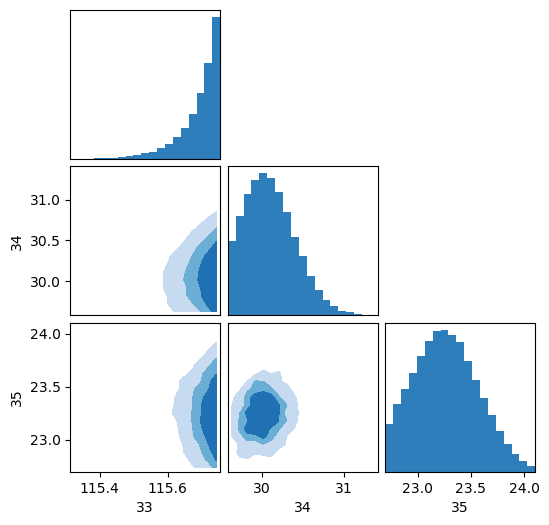

In [82]:
dims = [33, 34, 35]
names = [33, 34, 35]
levels = [0.1, 0.8, 0.9, 0.95, 1,]
# levels = [0.1, 0.5, 1,]
figsize = (6,6)
n_bins = 20

corner_plots(samples, dims, names, levels_quantiles = levels, figsize=figsize, N_bins=n_bins)

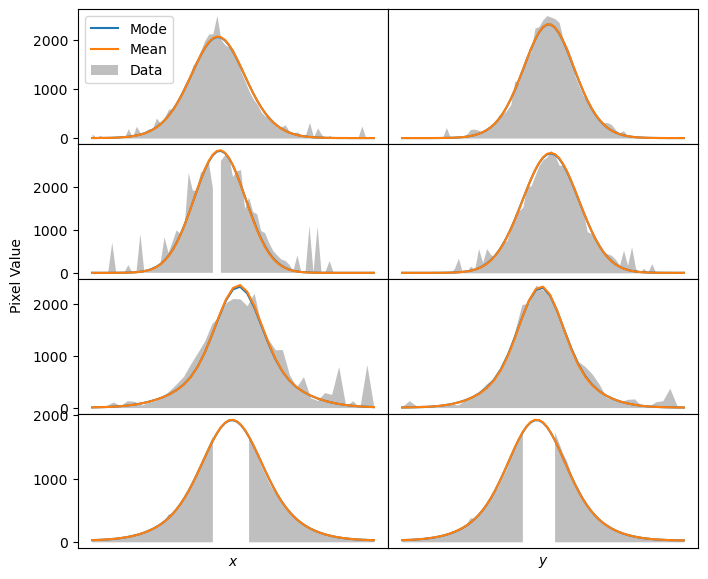

PyObject Text(0.04, 0.5, 'Pixel Value')

In [83]:
colors_array = ["C0", "C1"]
labels_array = ["Mode", "Mean"]
params_array = [mode(samples)[1], mean(samples)[1]]

plot_cam_crossections(params_array, event, conv_matrices, colors = colors_array, labels=labels_array)

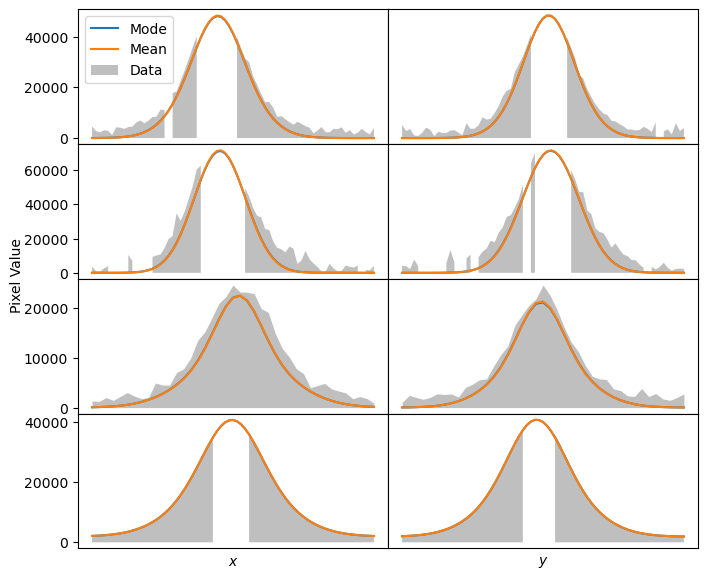

PyObject Text(0.04, 0.5, 'Pixel Value')

In [84]:
colors_array = ["C0", "C1"]
labels_array = ["Mode", "Mean"]
params_array = [mode(samples)[1], mean(samples)[1]]

plot_cam_integral(params_array, event, conv_matrices, colors = colors_array, labels=labels_array)

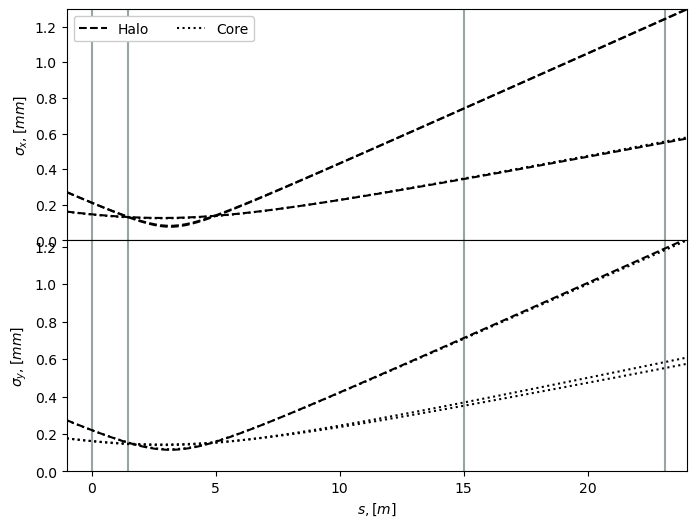

PyObject Text(0.5, 26.28125, '$s, [m]$')

In [85]:
params_array = [mode(samples)[1], mean(samples)[1]]
colors_array = ["gray", "C0", "C1"]
labels_array = ["Truth", "Mode", "Mean"]

plot_envelop_trajectory(params_array,  labels = labels_array, colors=colors_array)

In [86]:
images = load("../data/experiment/dataset_2/m2/images.jld2")
event_ns = (
    cam_1 = images["cam_1"][event_number,:,:],
    cam_2 = images["cam_2"][event_number,:,:],
    cam_3 = images["cam_3"][event_number,:,:],
    cam_4 = images["cam_4"][event_number,:,:],
    population = images["charge"][event_number,:][1],
);

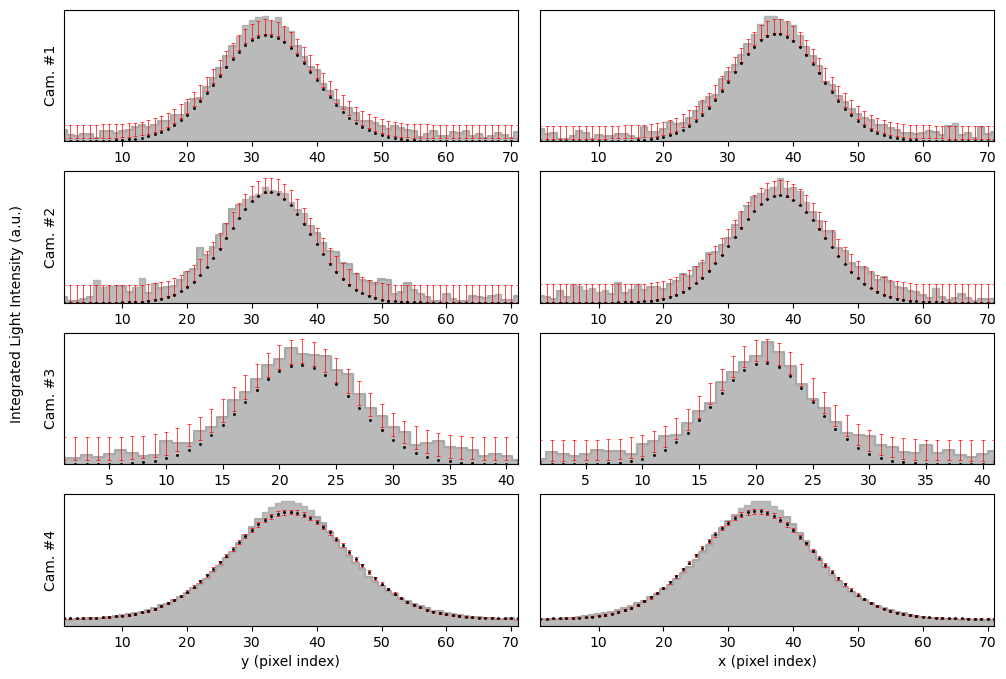

PyObject Text(0.08, 0.5, 'Integrated Light Intensity (a.u.)')

In [58]:
plot_projections(conv_matrices, event_ns, event, params_array[1], isnontr = true)

In [59]:
# try model 38 with light fluctuations constant on the IS2
# fixe resolution in the IS2 amera